In [1]:
import importlib
import preprocess
importlib.reload(preprocess)
from preprocess import preprocess
import calculate_stats
importlib.reload(calculate_stats)
from calculate_stats import calc_stats
import pandas as pd
import numpy as np

In [2]:
test_grid = 121391253
s_props = pd.read_csv('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/model_simulations/soil_props/smap_sprops_montzka_30cm_v1.csv')

In [3]:
# %%timeit
data = preprocess(grid_xy=test_grid)
res = calc_stats(data, s_props, grid_xy=test_grid, run_id = 100)

In [5]:
import matplotlib.pyplot as plt

## calculate statistics for decision stages 1 to 4, 

These stages correspond to the end 8, 16, 24, 32 days time from the beginning of the simulation. 

In [6]:
import datetime
def subset_data(data_daily, year, month):
    dt_start =  pd.Timestamp(datetime.date(year, month, 1))
    dt_end =    pd.Timestamp(datetime.date(year, month, 1) + datetime.timedelta(days = 35))
    idx = (data_daily['dt'] >= dt_start) & (data_daily['dt'] < dt_end)
    return data_daily.loc[idx]

In [7]:
def stage_indices(month, ds):
    if month ==12:
        indices = [x for x in range(8*ds-1, 720, 36)]
        indices[-1] = 695
    else:
        indices = [x for x in range(8*ds-1, 720, 36)]
    return np.array(indices, dtype=int)

In [8]:
from model_engine import cordova_vgm_params
top_layer_depth = 1000
params = cordova_vgm_params(s_props, grid_xy=test_grid, top_layer_depth=top_layer_depth)
theta_s = params[0]
theta_wp = params[1]
        
    

def cb2volsm(x_array):
    return (x_array + theta_wp)/(top_layer_depth + theta_wp)

 
_data = []
for month in range(1,13):
    for ds in range(1,5):
        init_list = res[month].keys()
        for init in init_list:
            idx = stage_indices(month=month, ds=ds)
            sm_list = np.array(res[month][init])
            sm_list = sm_list[idx]
            
            _data.append([month, ds,  cb2volsm(init), np.nanmean(sm_list), np.nanstd(sm_list)])
            # _data.append([month, ds,  init, np.nanmean(sm_list), np.nanstd(sm_list)])

df = pd.DataFrame(_data, columns = ['month', 'stage', 'init', 'mean', 'sd'])

KeyError: 1

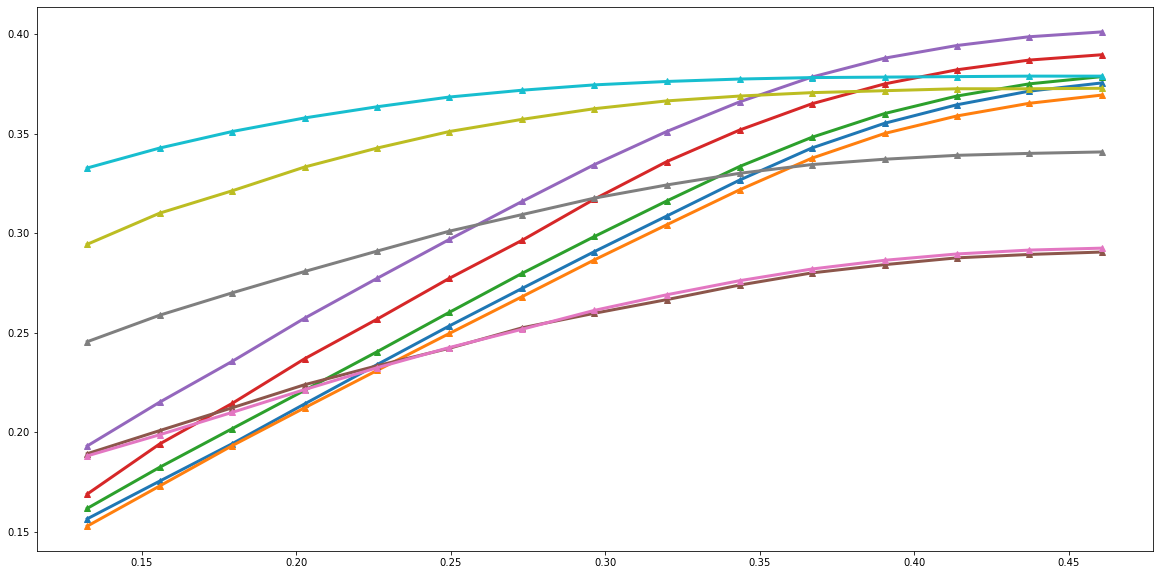

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    for month in range(1,6):
        idx_month = np.in1d(res['month'],month)
        idx_ds = np.in1d(res['stage'],ds)
                
        ax.plot(res['init'][idx_month & idx_ds], res['mean'][idx_month & idx_ds],  marker='^', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

NameError: name 'df' is not defined

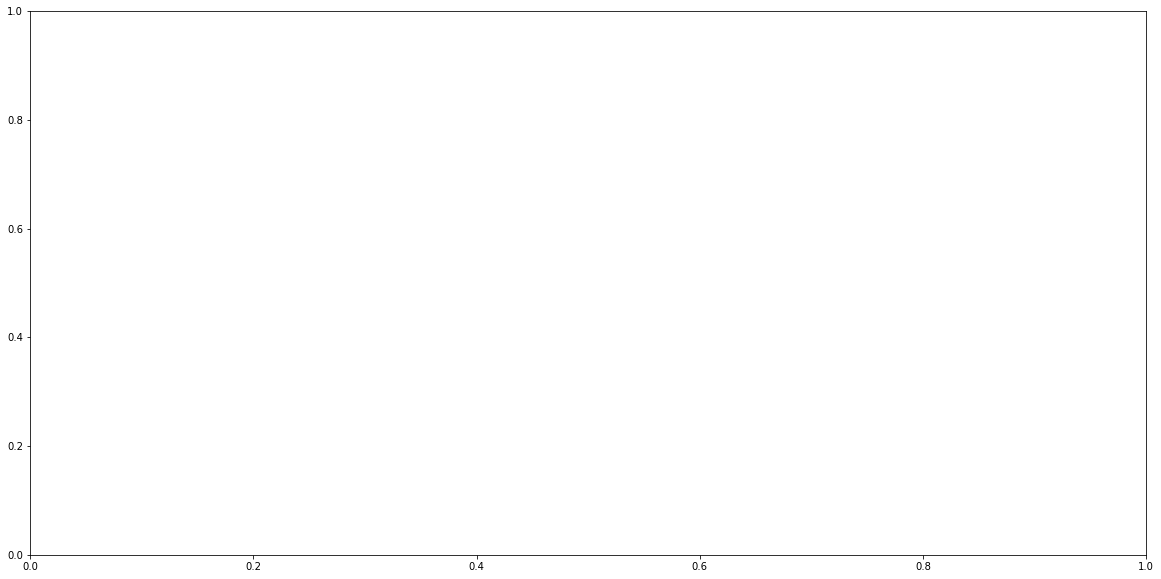

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
for ds in [1,4]:#range(1,3):
    for month in range(1,7):
        idx_month = np.in1d(df['month'],month)
        idx_ds = np.in1d(df['stage'],ds)
                
        ax.plot(df['init'][idx_month & idx_ds], df['sd'][idx_month & idx_ds],  marker='^', label= 'm = ' + str(month) + ' ' + str(ds*8) + ' Days', linewidth = 3)
# plt.legend(fontsize=18)

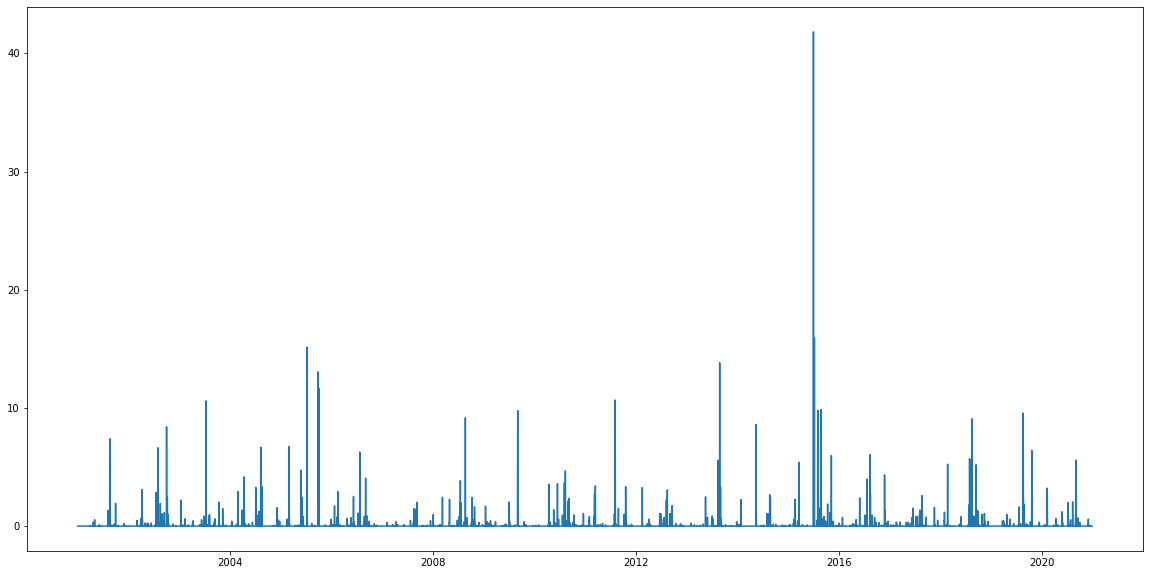

In [160]:
fig, ax = plt.subplots(figsize= (20,10))

ax.plot(data['dt'], data['gpm_p'])
# ax.set_xlim([datetime.date(2001,1,1),datetime.date(2005,12,30)])